In [1]:
# !pip install datapungibea
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import os
import pygraphviz as pgv

import datapungibea as dpb
key = '1FD5DC35-4854-4CE8-8D43-B36065C37041'
data = dpb.data(key) 
data

In [2]:
# # Collect county level variables
# for_county_index = data.Regional(GeoFips = "COUNTY",
#               LineCode = "1",
#               TableName = "CAGDP9", 
#               Year = "2010")
# for_county_index

In [3]:
# counties = for_county_index["GeoFips"]
# counties

In [4]:
# for_GDP_components = data.Regional(GeoFips = "01001",
#               LineCode = "ALL",
#               TableName = "CAGDP9", 
#               Year = "2010")
# for_GDP_components

In [5]:
# GDP_components = for_GDP_components[["Code", "Description"]]
# GDP_components

In [6]:
# import time
# import random

# for row in GDP_components.iterrows():
#     full_code, description = row[1]
#     table_name, code = full_code.split("-")
   
#     try:
#         GDP_data_dct[description] = data.Regional(GeoFips = "COUNTY",
#               LineCode = code,
#               TableName = table_name, 
#               Year = "ALL")
#         print(full_code +": " + description + " downloaded")
#     except:
#         print(full_code +": Error downloading " + description)
#     time.sleep(10)

In [7]:
# import os
# GDP_data_dct = {}
# folder1 = "Data"
# folder2 = "CountyGDP"
# try:
#     os.mkdir(folder1)
#     os.mkdir(folder1 + "/" + folder2)
# except:
#     try: 
#         os.mkdir(folder1 + "/" + folder2)
#     except:
#         pass
# # for key, val in GDP_data_dct.items():
# #     val.to_csv(folder1 + "/" + folder2 + "/" + key.replace("/","") + ".csv")

# for row in GDP_components.iterrows():
#     full_code, description = row
#     description = description[1]
#     # somehow, space added in very last character of description
#     GDP_data_dct[description] = pd.read_csv("Data/CountyGDP/" + description[:-1].replace("/","") + ".csv")
# GDP_data_dct
# # GDP_components

In [8]:
os.getcwd()

# for a,b,c in os.walk("."):
#     print(a,b,c)

'/Users/abiodun.idowu/Library/CloudStorage/OneDrive-NorthDakotaUniversitySystem/Desktop/PhD/BEA project/notebook_to_start'

In [9]:
#import data and convert datatype to int64
data = pd.read_csv('AbiData.csv')
# data.astype('int64')
# data = data.apply(pd.to_numeric, errors='coerce')
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column].str.replace(',', ''), errors='coerce').astype('Int64')

In [10]:
#set index as GeoFips and TimePeriod
data = data.set_index(["GeoFips", "TimePeriod"])

In [11]:
#let dataframe be equal to data imported
full_df = data

In [12]:
#convert dataframe to float64
full_df = full_df.astype('float64')

In [13]:
# full_df = pd.DataFrame({key[:-1]: val.set_index(["GeoFips", "TimePeriod"])["DataValue"] for key, val in GDP_data_dct.items()})
# for key, val in full_df.items():
#     try:
#         full_df[key] = val.str.replace(
#             ",","").replace("(NA)",np.NaN).replace("(D)", np.NaN).astype(float)
#     except:
#         continue
            
# full_df

In [14]:
# full_df[["Private industries ", "Utilities "]]
list (full_df.keys())

['Accommodation and food services',
 'Administrative and support and waste management and remediation services',
 'Agriculture, forestry, fishing and hunting',
 'All industry total',
 'Arts, entertainment, and recreation',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Construction',
 'Durable goods manufacturing',
 'Educational services, health care, and social assistance',
 'Educational services',
 'Finance and insurance',
 'Finance, insurance, real estate, rental, and leasing',
 'Government and government enterprises',
 'Health care and social assistance',
 'Information',
 'Management of companies and enterprises',
 'Manufacturing and information',
 'Manufacturing',
 'Mining, quarrying, and oil and gas extraction',
 'Natural resources and mining',
 'Nondurable goods manufacturing',
 'Other services (except government and government enterprises)',
 'Private goods-producing industries 2',
 'Private industries',
 'Private services-providing industries 3',
 'Pro

In [15]:
inputs = ['All industry total',"Utilities", "Mining, quarrying, and oil and gas extraction", 'Agriculture, forestry, fishing and hunting']
for key in inputs:
    full_df[key + " 3YMA"] = full_df.reset_index().set_index(["TimePeriod"], drop = False).groupby("GeoFips")[key].rolling(3).mean().shift()
log_df = np.log(full_df)#.groupby("GeoFips").diff()
for key in inputs:
    log_df[key + " Volatility"] = (log_df[key].sub(log_df[key + " 3YMA"])).pow(2).pow(.5)
# for key in inputs:

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


- GDP 
-- layer1

In [16]:
import json

In [17]:
toc = """All industry total
1 Private industries
1.1 Agriculture, forestry, fishing and hunting
1.2 Mining, quarrying, and oil and gas extraction
1.3 Utilities
1.4 Construction
1.5 Manufacturing
1.5.1 Durable goods manufacturing
1.5.2 Nondurable goods manufacturing
1.6 Wholesale trade
1.7 Retail trade
1.8 Transportation and warehousing
1.9 Information
1.10 Finance, insurance, real estate, rental, and leasing
1.11 Finance and insurance
1.12 Real estate and rental and leasing
1.13 Professional and business services
1.14 Professional, scientific, and technical services
1.15 Management of companies and enterprises
1.16 Administrative and support and waste management and remediation services
1.17 Educational services, health care, and social assistance
1.18 Educational services
1.19 Health care and social assistance
1.20 Arts, entertainment, recreation, accommodation, and food services
1.21 Arts, entertainment, and recreation
1.22 Accommodation and food services
1.23 Other services (except government and government enterprises)
1.24 Government and government enterprises
1.25 Natural resources and mining
1.26 Trade
1.27 Transportation and utilities
1.28 Manufacturing and information
1.29 Private goods-producing industries 2/
1.30 Private services-providing industries 3/
2 """

myfile = 'GDP'

data = {myfile:{}}
for line in toc.splitlines():
    levels, title = line.split(' ', maxsplit=1)
    levels = levels.rstrip('.').split('.')
    if len(levels) == 1:
        heading = title
        data[myfile][heading] = {}
    elif len(levels) == 2:
        sub_heading = title
        data[myfile][heading][sub_heading] = []
#     if len(levels) == 3:
#         data[myfile][heading][sub_heading].append(title)

print(json.dumps(data, indent=4))

{
    "GDP": {
        "industry total": {},
        "Private industries": {
            "Agriculture, forestry, fishing and hunting": [],
            "Mining, quarrying, and oil and gas extraction": [],
            "Utilities": [],
            "Construction": [],
            "Manufacturing": [],
            "Wholesale trade": [],
            "Retail trade": [],
            "Transportation and warehousing": [],
            "Information": [],
            "Finance, insurance, real estate, rental, and leasing": [],
            "Finance and insurance": [],
            "Real estate and rental and leasing": [],
            "Professional and business services": [],
            "Professional, scientific, and technical services": [],
            "Management of companies and enterprises": [],
            "Administrative and support and waste management and remediation services": [],
            "Educational services, health care, and social assistance": [],
            "Educational services": []

In [18]:
dct = data["GDP"]
layer1 = list(dct.keys())
layer1.pop()
layer2 = []
for key in layer1:
    layer2 = layer2 + list(dct[key].keys())
layers = {0:layer1,
         1:layer2}
layers

{0: ['industry total', 'Private industries'],
 1: ['Agriculture, forestry, fishing and hunting',
  'Mining, quarrying, and oil and gas extraction',
  'Utilities',
  'Construction',
  'Manufacturing',
  'Wholesale trade',
  'Retail trade',
  'Transportation and warehousing',
  'Information',
  'Finance, insurance, real estate, rental, and leasing',
  'Finance and insurance',
  'Real estate and rental and leasing',
  'Professional and business services',
  'Professional, scientific, and technical services',
  'Management of companies and enterprises',
  'Administrative and support and waste management and remediation services',
  'Educational services, health care, and social assistance',
  'Educational services',
  'Health care and social assistance',
  'Arts, entertainment, recreation, accommodation, and food services',
  'Arts, entertainment, and recreation',
  'Accommodation and food services',
  'Other services (except government and government enterprises)',
  'Government and gover

In [19]:
layer2

['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance, insurance, real estate, rental, and leasing',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Professional, scientific, and technical services',
 'Management of companies and enterprises',
 'Administrative and support and waste management and remediation services',
 'Educational services, health care, and social assistance',
 'Educational services',
 'Health care and social assistance',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services (except government and government enterprises)',
 'Government and government enterprises',
 'Natural resources and mining',
 'Trade',
 'Transpor

In [20]:
# keys = ['Agriculture, forestry, fishing and hunting',
#  'Mining, quarrying, and oil and gas extraction',
#  'Utilities',
#  'Construction',
#  'Manufacturing',
#  'Wholesale trade',
#  'Retail trade',
#  'Transportation and warehousing',
#  'Information',
#  'Finance, insurance, real estate, rental, and leasing',
#  'Finance and insurance',
#  'Professional and business services',
#  'Educational services, health care, and social assistance',
#  'Arts, entertainment, recreation, accommodation, and food services',
#  'Other services (except government and government enterprises)',
#  'Government and government enterprises']

In [21]:
# data2 = log_df[layer2].groupby("GeoFips").diff()
# # list(log_df.keys())

In [22]:
# data2

# list(data2)
# log_df
full_df

Accommodation and food services  \
GeoFips TimePeriod                                    
1001    2001                                46510.0   
        2002                                45576.0   
        2003                                48870.0   
        2004                                49738.0   
        2005                                46414.0   
...                                             ...   
56045   2016                                 3499.0   
        2017                                    NaN   
        2018                                    NaN   
        2019                                    NaN   
        2020                                    NaN   

                    Administrative and support and waste management and remediation services  \
GeoFips TimePeriod                                                                             
1001    2001                                                      NaN                          
        2002                                                      NaN                          
        2003                                                      NaN                          
        2004                                                      NaN                          
        2005                                                      NaN                          
...                                                               ...                          
56045   2016                                                    655.0                          
        2017                                                      NaN                          
        2018                                                      NaN                          
        2019                                                    756.0                          
        2020                                                    908.0                          

                    Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2001                                           22455.0   
        2002                                           18063.0   
        2003                                           39941.0   
        2004                                           49903.0   
        2005                                           59099.0   
...                                                        ...   
56045   2016                                           13871.0   
        2017                                           19901.0   
        2018                                           23787.0   
        2019                                           14194.0   
        2020                                            8653.0   

                    All industry total  Arts, entertainment, and recreation  \
GeoFips TimePeriod                                                            
1001    2001                  949800.0                               2150.0   
        2002                  984039.0                               1935.0   
        2003                 1008032.0                               1846.0   
        2004                 1170278.0                               1897.0   
        2005                 1195319.0                               2277.0   
...                                ...                                  ...   
56045   2016                  305446.0                                351.0   
        2017                  300909.0                                  NaN   
        2018                  315332.0                                  NaN   
        2019                  322576.0                                  NaN   
        2020                  312665.0                                  NaN   

                    Arts, entertainment, recreation, accommodation, and food services  \
GeoFips TimePeriod                                                             

In [23]:
data_dct_ips = {}
data_dct_ips['Log_Data'] = np.log(full_df)
data_dct_ips['Diff1'] = data_dct_ips['Log_Data'].groupby('GeoFips').diff()
data_dct_ips

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


{'Log_Data':                     Accommodation and food services  \
 GeoFips TimePeriod                                    
 1001    2001                              10.747423   
         2002                              10.727137   
         2003                              10.796919   
         2004                              10.814525   
         2005                              10.745356   
 ...                                             ...   
 56045   2016                               8.160232   
         2017                                    NaN   
         2018                                    NaN   
         2019                                    NaN   
         2020                                    NaN   
 
                     Administrative and support and waste management and remediation services  \
 GeoFips TimePeriod                                                                             
 1001    2001                                                   

In [24]:
data_dct = {}
data_dct["Log Data"] = np.log(full_df).replace([np.inf, -np.inf], np.nan)
data_dct["Diff"] = data_dct["Log Data"].groupby("GeoFips").diff()#.dropna()
data_dct["2Diff"] = data_dct["Diff"].groupby("GeoFips").diff()
data_dct

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


{'Log Data':                     Accommodation and food services  \
 GeoFips TimePeriod                                    
 1001    2001                              10.747423   
         2002                              10.727137   
         2003                              10.796919   
         2004                              10.814525   
         2005                              10.745356   
 ...                                             ...   
 56045   2016                               8.160232   
         2017                                    NaN   
         2018                                    NaN   
         2019                                    NaN   
         2020                                    NaN   
 
                     Administrative and support and waste management and remediation services  \
 GeoFips TimePeriod                                                                             
 1001    2001                                                   

write if the variables are sub-components

In [25]:
# remove duplicate first index column
def reset_index(df):
    name1,name2 = list(df.index.names)[1:]
    ix1, ix2 =df.index.get_level_values(1), df.index.get_level_values(2) 
    df[name1] = ix1
    df[name2] = ix2
    df.reset_index(drop=True, inplace = True)
    df.set_index(["GeoFips", "TimePeriod"], inplace = True)
    
ips_keys = ['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 "All industry total"]
ips_df = data_dct["Diff"][ips_keys]
ips_df = ips_df[ips_df.index.get_level_values("TimePeriod")>2001]
ips_df = ips_df.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()
ips_df


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_17634/1118412389.py:16: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ips_df = ips_df.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()


Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2002                                         -0.217648   
        2003                                          0.793538   
        2004                                          0.222678   
        2005                                          0.169133   
        2006                                          0.176881   
...                                                        ...   
56041   2016                                          0.016426   
        2017                                         -0.156890   
        2018                                          0.231567   
        2019                                          0.839924   
        2020                                          0.274166   

                    Mining, quarrying, and oil and gas extraction  Utilities  \
GeoFips TimePeriod                                                             
1001    2002                                            -0.419451   0.835570   
        2003                                             0.191126   0.068072   
        2004                                             0.470578   0.505041   
        2005                                             0.238805  -0.239593   
        2006                                             0.342614   0.436516   
...                                                           ...        ...   
56041   2016                                            -0.081156   0.211513   
        2017                                            -0.158175   0.004846   
        2018                                            -0.207405  -0.179435   
        2019                                            -0.452308   0.279935   
        2020                                            -0.747581  -0.020288   

                    All industry total  
GeoFips TimePeriod                      
1001    2002                  0.035414  
        2003                  0.024090  
        2004                  0.149241  
        2005                  0.021172  
        2006                  0.066174  
...                                ...  
56041   2016                 -0.006544  
        2017                 -0.023853  
        2018                 -0.037587  
        2019                 -0.024081  
        2020                 -0.108416  

[11343 rows x 4 columns]

In [26]:

# ips_df2 = ips_df.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin():])
# reset_index(ips_df2)
# ips_df2 = ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[:x.isnull().values.argmax()])
# reset_index(ips_df2)
# for i in range(3):
#     ips_df2 = ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin()+1:])
#     reset_index(ips_df2)
# # .values.argmin()


In [27]:
# ips_df.iloc[
# data.iloc[:data.A.isnull().values.argmax()]
# ips_df2 = ips_df.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin()+1:])
# ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[:x.isnull().values.argmax()])

In [28]:
from statsmodels.tsa.stattools import adfuller

def adfuller_table(df):
    df_results = {}
    for key, vector in df.items():
        dftest = adfuller(vector, maxlag = 4, regression = 'c')
        df_results[key] = pd.Series(dftest[0:4], index = ['t-stat', 'p-value', 
                                                         '#Lags Used', 'Number of Observations Used'])
    return pd.DataFrame(df_results).round(2)

In [29]:
# adfuller_table(data_dct['Diff'])

In [30]:
import statistics
import math
data = data_dct_ips['Diff1'].replace([np.inf, -np.inf]).fillna(0)
data
data_ips = {}
# data_ips = data.reset_index()
data_ips['Diff']= data
data_ips

{'Diff':                     Accommodation and food services  \
 GeoFips TimePeriod                                    
 1001    2001                               0.000000   
         2002                              -0.020286   
         2003                               0.069782   
         2004                               0.017606   
         2005                              -0.069168   
 ...                                             ...   
 56045   2016                               0.000000   
         2017                               0.000000   
         2018                               0.000000   
         2019                               0.000000   
         2020                               0.000000   
 
                     Administrative and support and waste management and remediation services  \
 GeoFips TimePeriod                                                                             
 1001    2001                                                 0.0000

In [31]:

# data_ips_var = ['GeoFips', 'TimePeriod', 'All industry total']
# data_ips_t = data_ips[data_ips_var]
# data_ips_t
# data_ips_t['All industry total'].replace(to_replace = 0, value = 1, inplace=True)

In [32]:
# data_test = pd.read_csv('ips.csv')
# data_test

# IPS Test

In [33]:
def ips_test(data, Firm, Time):
    df = data.set_index([Firm, Time])
    df2 = data.set_index([Time, Firm])
    firms = list(data[Firm].unique())
    times = list(data[Time].unique())
    data = data.set_index(Firm)
    N = len(firms)
    dict_temp = {}

    for firm in firms:
        lag_val = []
        val_diff = []
        lag_val_diff = []
        for i in data[Time].loc[firm]:
            cur_val = i
            if lag_val == []:
                pass
            else:
                val_diff = cur_val - lag_val
            if lag_val_diff == []:
                pass
            else:
                if val_diff != lag_val_diff:
                    raise ValueError("The data does not have constant time variation")
            lag_val = i
            lag_val_diff = val_diff

        for key in df:
            total_temp_stat = 0
            for firm in firms:
                temp_df = data[[key]].loc[firm]
                temp_stat = adfuller(temp_df, maxlag = 0, regression = 'ct')[0]
                total_temp_stat += temp_stat
                t_bar = (1/N)*total_temp_stat
                dict_temp[key] = t_bar

    df_temp = pd.DataFrame([dict_temp]).T
    df_temp.columns = ['Test Stat']
    return df_temp

Download interest rate data (divisia), and average it annually

In [34]:
divisia = pd.read_excel("https://centerforfinancialstability.org/amfm/Divisia.xlsx", 
                        sheet_name = "Broad", header  =1, index_col = "Date")

index = divisia.index
keys = divisia.keys()
divisia = divisia.resample("A").mean().rename(columns={keys[0]: "M4",
                                                       keys[2]:"M4 Interest Rate"})
year_lst = [i for i in range(1966, 2023)]
divisia = divisia[["M4", "M4 Interest Rate"]].reset_index()
divisia["TimePeriod"] = year_lst
divisia = divisia.set_index("TimePeriod").drop(columns = "Date")
divisia.head()

,M4,M4 Interest Rate
TimePeriod,,
1966,103.844851,0.033092
1967,111.125854,0.036325
1968,116.668001,0.042463
1969,119.173341,0.042731
1970,130.436453,0.034850


In [35]:
# data["Level"]["$r_{M4}$"] = divisia["M4 Interest Rate"]

Add/join the interest rates to the original dataframe

In [36]:
data_df = full_df.copy().reset_index().set_index("TimePeriod")
data_df = data_df.join(divisia).reset_index()     
data_df = data_df.set_index(["GeoFips", "TimePeriod"])    
data_df = data_df.sort_index()
data_df 

Accommodation and food services  \
GeoFips TimePeriod                                    
1001    2001                                46510.0   
        2002                                45576.0   
        2003                                48870.0   
        2004                                49738.0   
        2005                                46414.0   
...                                             ...   
56045   2016                                 3499.0   
        2017                                    NaN   
        2018                                    NaN   
        2019                                    NaN   
        2020                                    NaN   

                    Administrative and support and waste management and remediation services  \
GeoFips TimePeriod                                                                             
1001    2001                                                      NaN                          
        2002                                                      NaN                          
        2003                                                      NaN                          
        2004                                                      NaN                          
        2005                                                      NaN                          
...                                                               ...                          
56045   2016                                                    655.0                          
        2017                                                      NaN                          
        2018                                                      NaN                          
        2019                                                    756.0                          
        2020                                                    908.0                          

                    Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2001                                           22455.0   
        2002                                           18063.0   
        2003                                           39941.0   
        2004                                           49903.0   
        2005                                           59099.0   
...                                                        ...   
56045   2016                                           13871.0   
        2017                                           19901.0   
        2018                                           23787.0   
        2019                                           14194.0   
        2020                                            8653.0   

                    All industry total  Arts, entertainment, and recreation  \
GeoFips TimePeriod                                                            
1001    2001                  949800.0                               2150.0   
        2002                  984039.0                               1935.0   
        2003                 1008032.0                               1846.0   
        2004                 1170278.0                               1897.0   
        2005                 1195319.0                               2277.0   
...                                ...                                  ...   
56045   2016                  305446.0                                351.0   
        2017                  300909.0                                  NaN   
        2018                  315332.0                                  NaN   
        2019                  322576.0                                  NaN   
        2020                  312665.0                                  NaN   

                    Arts, entertainment, recreation, accommodation, and food services  \
GeoFips TimePeriod                                                             

Convert variables to rates and differenced data

In [37]:
data_dct1 = {}
data_dct1["Log Data"] = np.log(data_df).replace([np.inf, -np.inf], np.nan)
data_dct1["Diff"] = data_dct1["Log Data"].groupby("GeoFips").diff()#.dropna()
#data_dct1["2Diff"] = data_dct1["Diff"].groupby("GeoFips").diff()
data_dct1

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


{'Log Data':                     Accommodation and food services  \
 GeoFips TimePeriod                                    
 1001    2001                              10.747423   
         2002                              10.727137   
         2003                              10.796919   
         2004                              10.814525   
         2005                              10.745356   
 ...                                             ...   
 56045   2016                               8.160232   
         2017                                    NaN   
         2018                                    NaN   
         2019                                    NaN   
         2020                                    NaN   
 
                     Administrative and support and waste management and remediation services  \
 GeoFips TimePeriod                                                                             
 1001    2001                                                   

Remove years with nan

In [38]:
# remove duplicate first index column
def reset_index(df):
    name1,name2 = list(df.index.names)[1:]
    ix1, ix2 =df.index.get_level_values(1), df.index.get_level_values(2) 
    df[name1] = ix1
    df[name2] = ix2
    df.reset_index(drop=True, inplace = True)
    df.set_index(["GeoFips", "TimePeriod"], inplace = True)
    
ips_keys = ['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 "All industry total",
           "M4",
           "M4 Interest Rate"]
# ips_df1 = data_dct1["Diff"][ips_keys]
ips_df1 = data_dct1["Log Data"][ips_keys]
ips_df1 = ips_df1[ips_df1.index.get_level_values("TimePeriod")>2001]
ips_df1 = ips_df1.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()

ips_df1["M4 Interest Rate"] = data_df["M4 Interest Rate"]
ips_df1

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_17634/1911413291.py:19: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ips_df1 = ips_df1.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()


Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2002                                          9.801621   
        2003                                         10.595159   
        2004                                         10.817836   
        2005                                         10.986969   
        2006                                         11.163850   
...                                                        ...   
56041   2016                                          9.037058   
        2017                                          8.880168   
        2018                                          9.111735   
        2019                                          9.951658   
        2020                                         10.225825   

                    Mining, quarrying, and oil and gas extraction  Utilities  \
GeoFips TimePeriod                                                             
1001    2002                                             8.023880  10.884067   
        2003                                             8.215006  10.952139   
        2004                                             8.685585  11.457180   
        2005                                             8.924390  11.217587   
        2006                                             9.267004  11.654104   
...                                                           ...        ...   
56041   2016                                            12.194111   9.942372   
        2017                                            12.035937   9.947217   
        2018                                            11.828532   9.767782   
        2019                                            11.376223  10.047718   
        2020                                            10.628642  10.027429   

                    All industry total        M4  M4 Interest Rate  
GeoFips TimePeriod                                                  
1001    2002                 13.799421  6.792151          0.007415  
        2003                 13.823510  6.840900          0.008946  
        2004                 13.972752  6.895190          0.020889  
        2005                 13.993924  6.951430          0.032386  
        2006                 14.060098  7.014953          0.033669  
...                                ...       ...               ...  
56041   2016                 13.774393  7.294431          0.003105  
        2017                 13.750540  7.337525          0.006836  
        2018                 13.712953  7.390240          0.008433  
        2019                 13.688872  7.598499          0.002033  
        2020                 13.580456  7.696262          0.000516  

[11913 rows x 6 columns]

In [39]:
# years = ips_df.groupby("TimePeriod").mean().index
# entities = ips_df.groupby("GeoFips").mean().index
# years, entities

enter data that is the same for *every* year entry

using year as example for data entry here

In [40]:
# df = ips_df.copy()
# df["New"] = np.nan
# for year in years:
#     df["New"][df.index.get_level_values("TimePeriod") == year] = year
# df

In [41]:
ips_dct = {"Log":ips_df}
ips_dct["Rates"] = ips_dct["Log"].groupby("GeoFips").diff()
ips_dct["Diff"] = ips_dct["Rates"].groupby("GeoFips").diff()

Run the IPS test

In [42]:
# import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller

def ips_test(data):
    index_name, sub_index_name = data.index.names
    index = list(data.reset_index()[index_name].unique())
    N = len(index)
    t_stats = {}
    df_index_dict = {}
    for ix in index:
        slice_df = data.loc[ix]
#         print(slice_df)
        t_stats[ix] = {}
        for key in slice_df.keys():
            try:
                t_stat = adfuller(slice_df[key], maxlag = 1, regression = 'c')[0]
                t_stats[ix][key] = t_stat
            except:
                print("Error:", key)
    t_stats = pd.DataFrame(t_stats).T

    return t_stats.mean()
   
ips_results = {}
for key, val in ips_dct.items():
    ips_results[key] = ips_test(val.dropna())
pd.DataFrame(ips_results).dropna()


,Log,Rates,Diff
"Agriculture, forestry, fishing and hunting",-5.414102,-6.708298,-7.180468
"Mining, quarrying, and oil and gas extraction",-4.065713,-5.900292,-6.764893
Utilities,-4.718953,-6.403677,-7.053029
All industry total,-3.889409,-5.733595,-6.582149


In [43]:
ips_dct2 = {"Log":ips_df1}
ips_dct2["Rates"] = ips_dct2["Log"].groupby("GeoFips").diff()
ips_dct2["Diff"] = ips_dct2["Rates"].groupby("GeoFips").diff()

In [44]:
# import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller

def ips_test(data):
    index_name, sub_index_name = data.index.names
    index = list(data.reset_index()[index_name].unique())
    N = len(index)
    t_stats = {}
    df_index_dict = {}
    for ix in index:
        slice_df = data.loc[ix]
#         print(slice_df)
        t_stats[ix] = {}
        for key in slice_df.keys():
            try:
                t_stat = adfuller(slice_df[key], maxlag = 1, regression = 'c')[0]
                t_stats[ix][key] = t_stat
            except:
                print("Error:", key)
    t_stats = pd.DataFrame(t_stats).T

    return t_stats.mean()
   
ips_results = {}
for key, val in ips_dct2.items():
    ips_results[key] = ips_test(val.dropna())
pd.DataFrame(ips_results).dropna()


,Log,Rates,Diff
"Agriculture, forestry, fishing and hunting",-2.715746,-5.253833,-6.518411
"Mining, quarrying, and oil and gas extraction",-1.759423,-3.903908,-5.763552
Utilities,-1.409258,-4.560160,-6.163084
All industry total,-1.825759,-3.837968,-5.645070
M4,1.488753,-2.442023,-4.984564
M4 Interest Rate,-2.680588,-4.714047,-4.381528


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_17634/3710630771.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.rename(columns = {key:key.replace(" ", "\n") for key in plot_df.keys()}, inplace = True)
/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_17634/3710630771.py:16: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  a = pd.plotting.scatter_matrix(data, c = color,


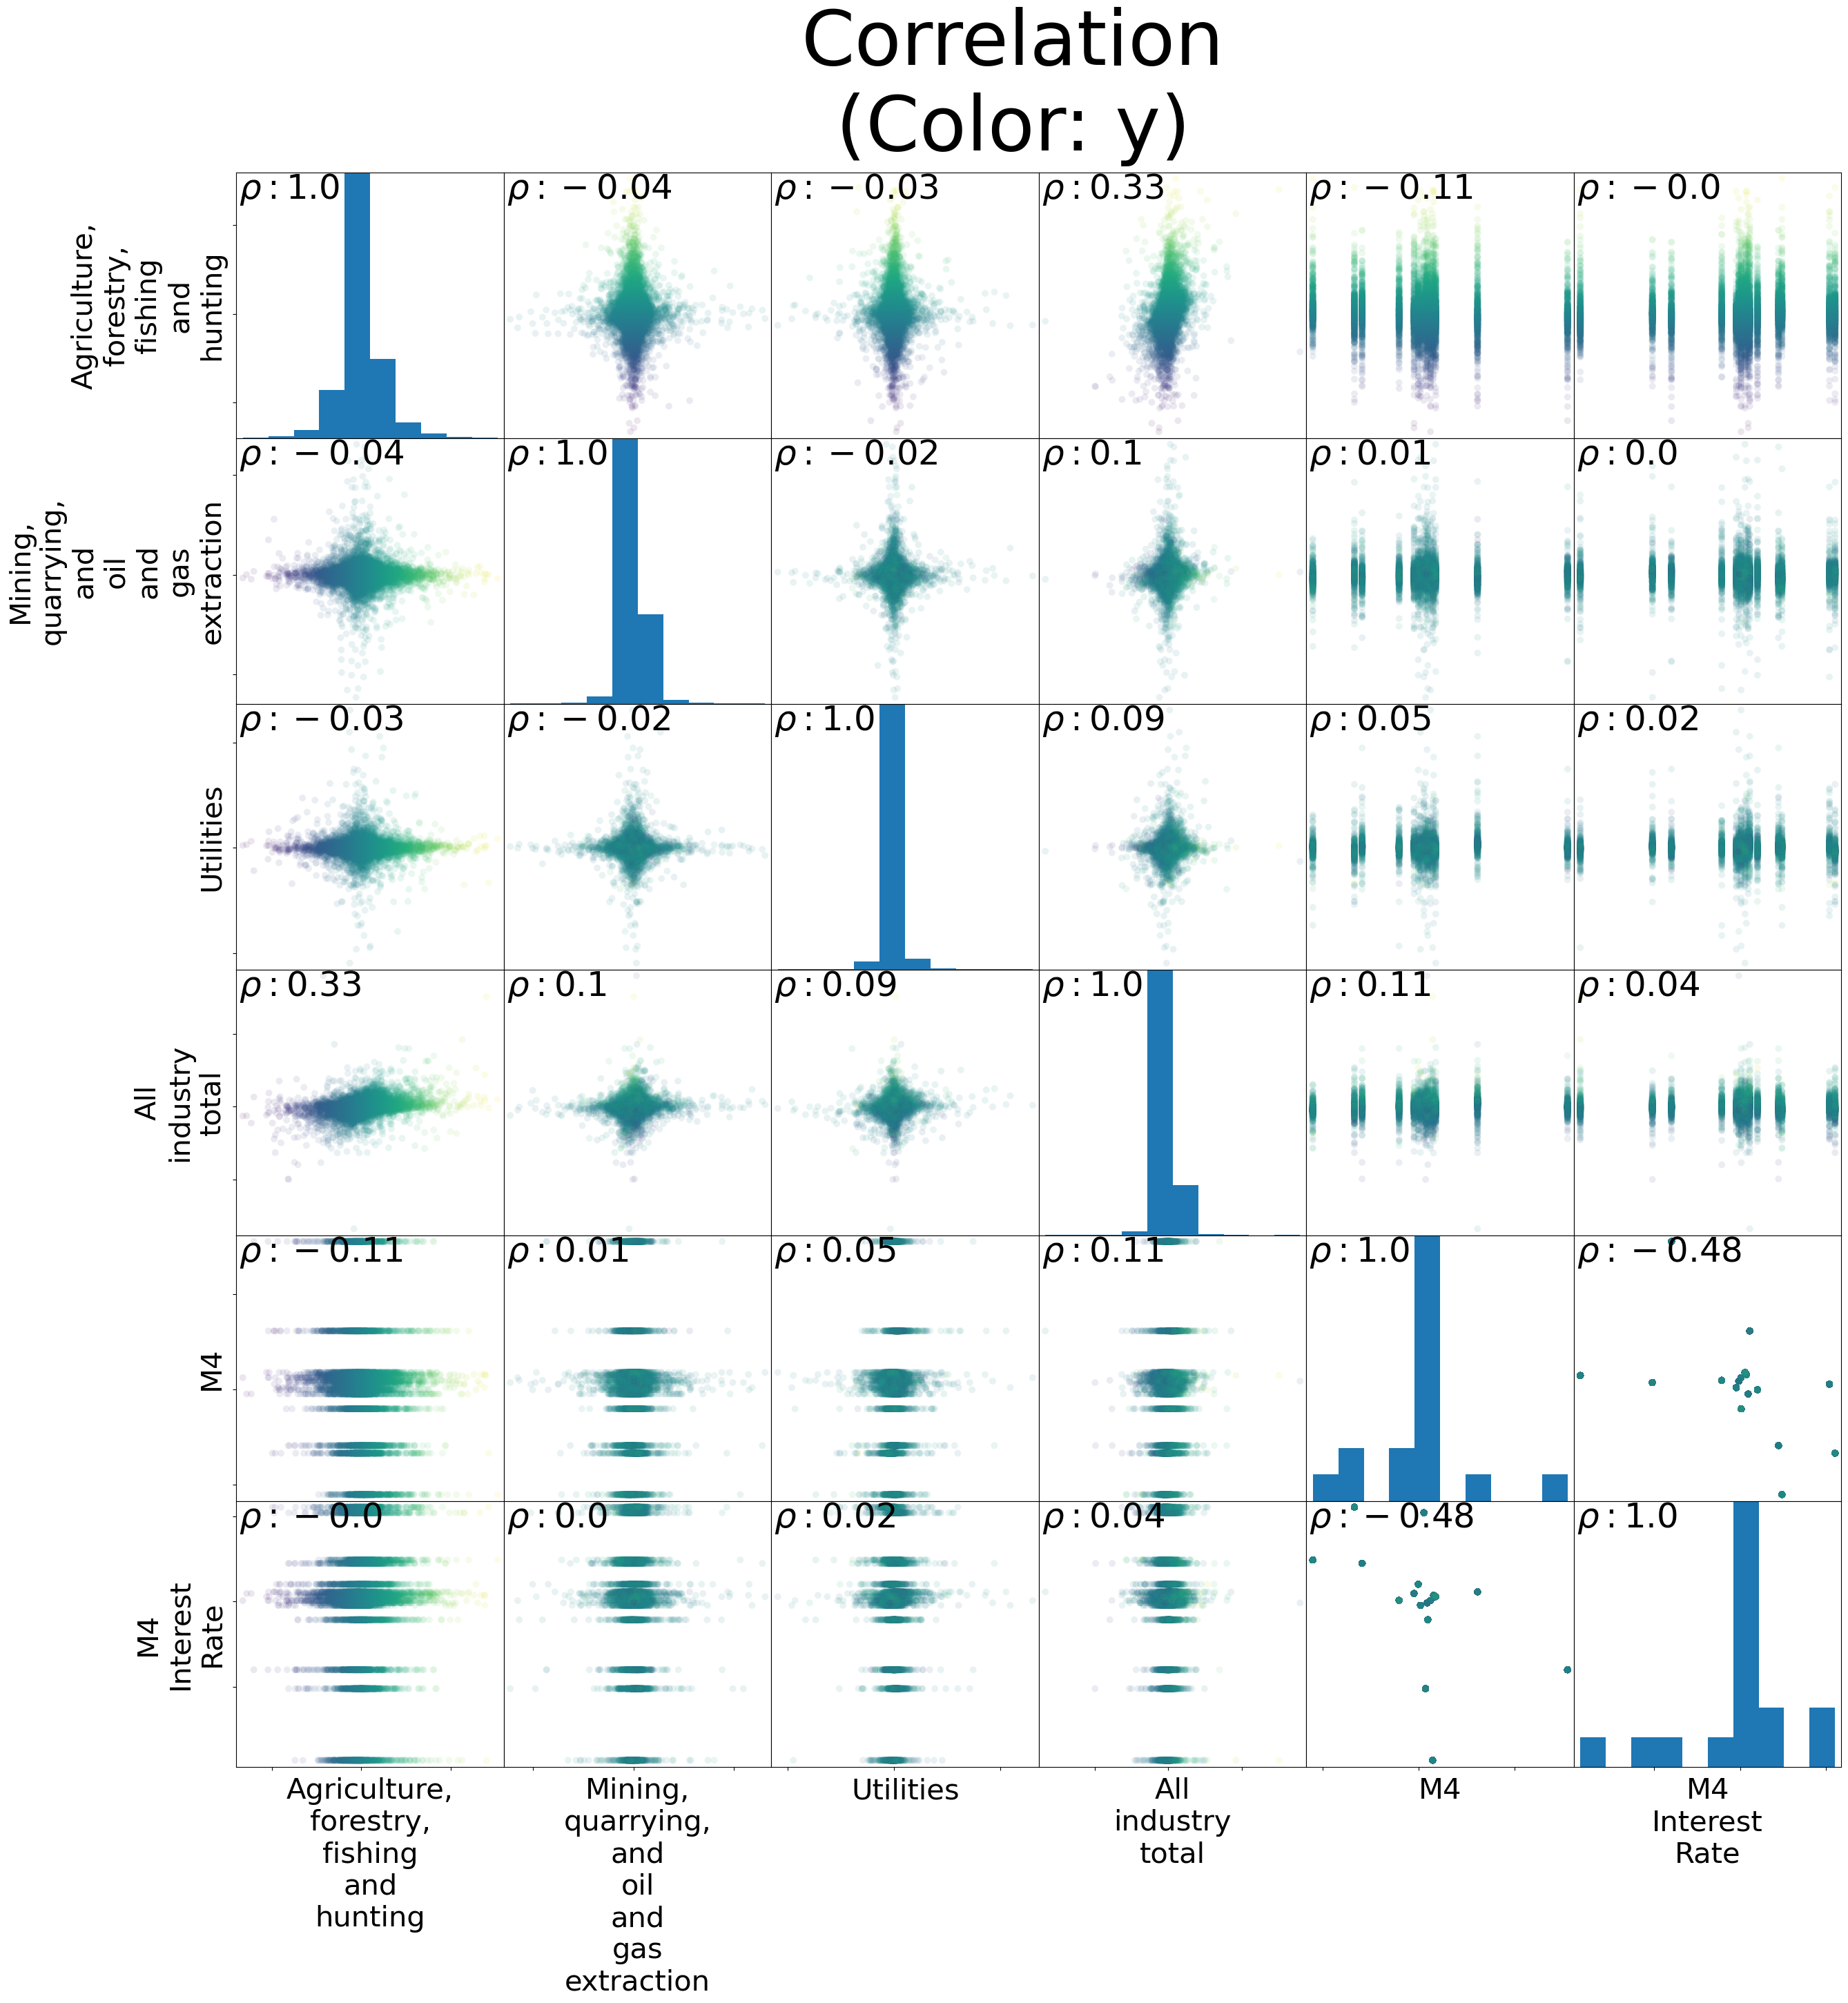

In [45]:
import pingouin
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
def full_corr_plot(data, color = "C0", pcorr = False):
    if pcorr == True:
        corr_df = data.pcorr()
    elif pcorr == False:
        corr_df = data.corr()
    keys = list(corr_df.keys())
    dim = len(keys)

    fig, ax = plt.subplots(figsize = (30, 30))
    a = pd.plotting.scatter_matrix(data, c = color, 
                                   s = 200, alpha = .1, ax=ax)  
    for i in range(len(keys)):
        x = keys[i]
        for j in range(len(keys)):
            y = keys[j]
            a[i][j].set_xticklabels([])
            a[i][j].set_yticklabels([])
            a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .88, x = 0.01, ha = "left")        
    plt.suptitle("Correlation\n(Color: y)",y = .96, fontsize = 80)
plot_df = ips_dct2['Diff'].dropna()
plot_df.rename(columns = {key:key.replace(" ", "\n") for key in plot_df.keys()}, inplace = True)
plot_keys = list(plot_df.keys())
full_corr_plot(plot_df, color = plot_df[plot_keys[0]], pcorr = True)
# y_var = ['Agriculture, forestry, fishing and hunting']
# x_vars = ['Mining, quarrying, and oil and gas extraction', 'Utilities', 'Construction', 'Manufacturing']
# corr_var = y_var + x_vars
# corr_data = log_df[corr_var]
# corr_data.corr().round(3)

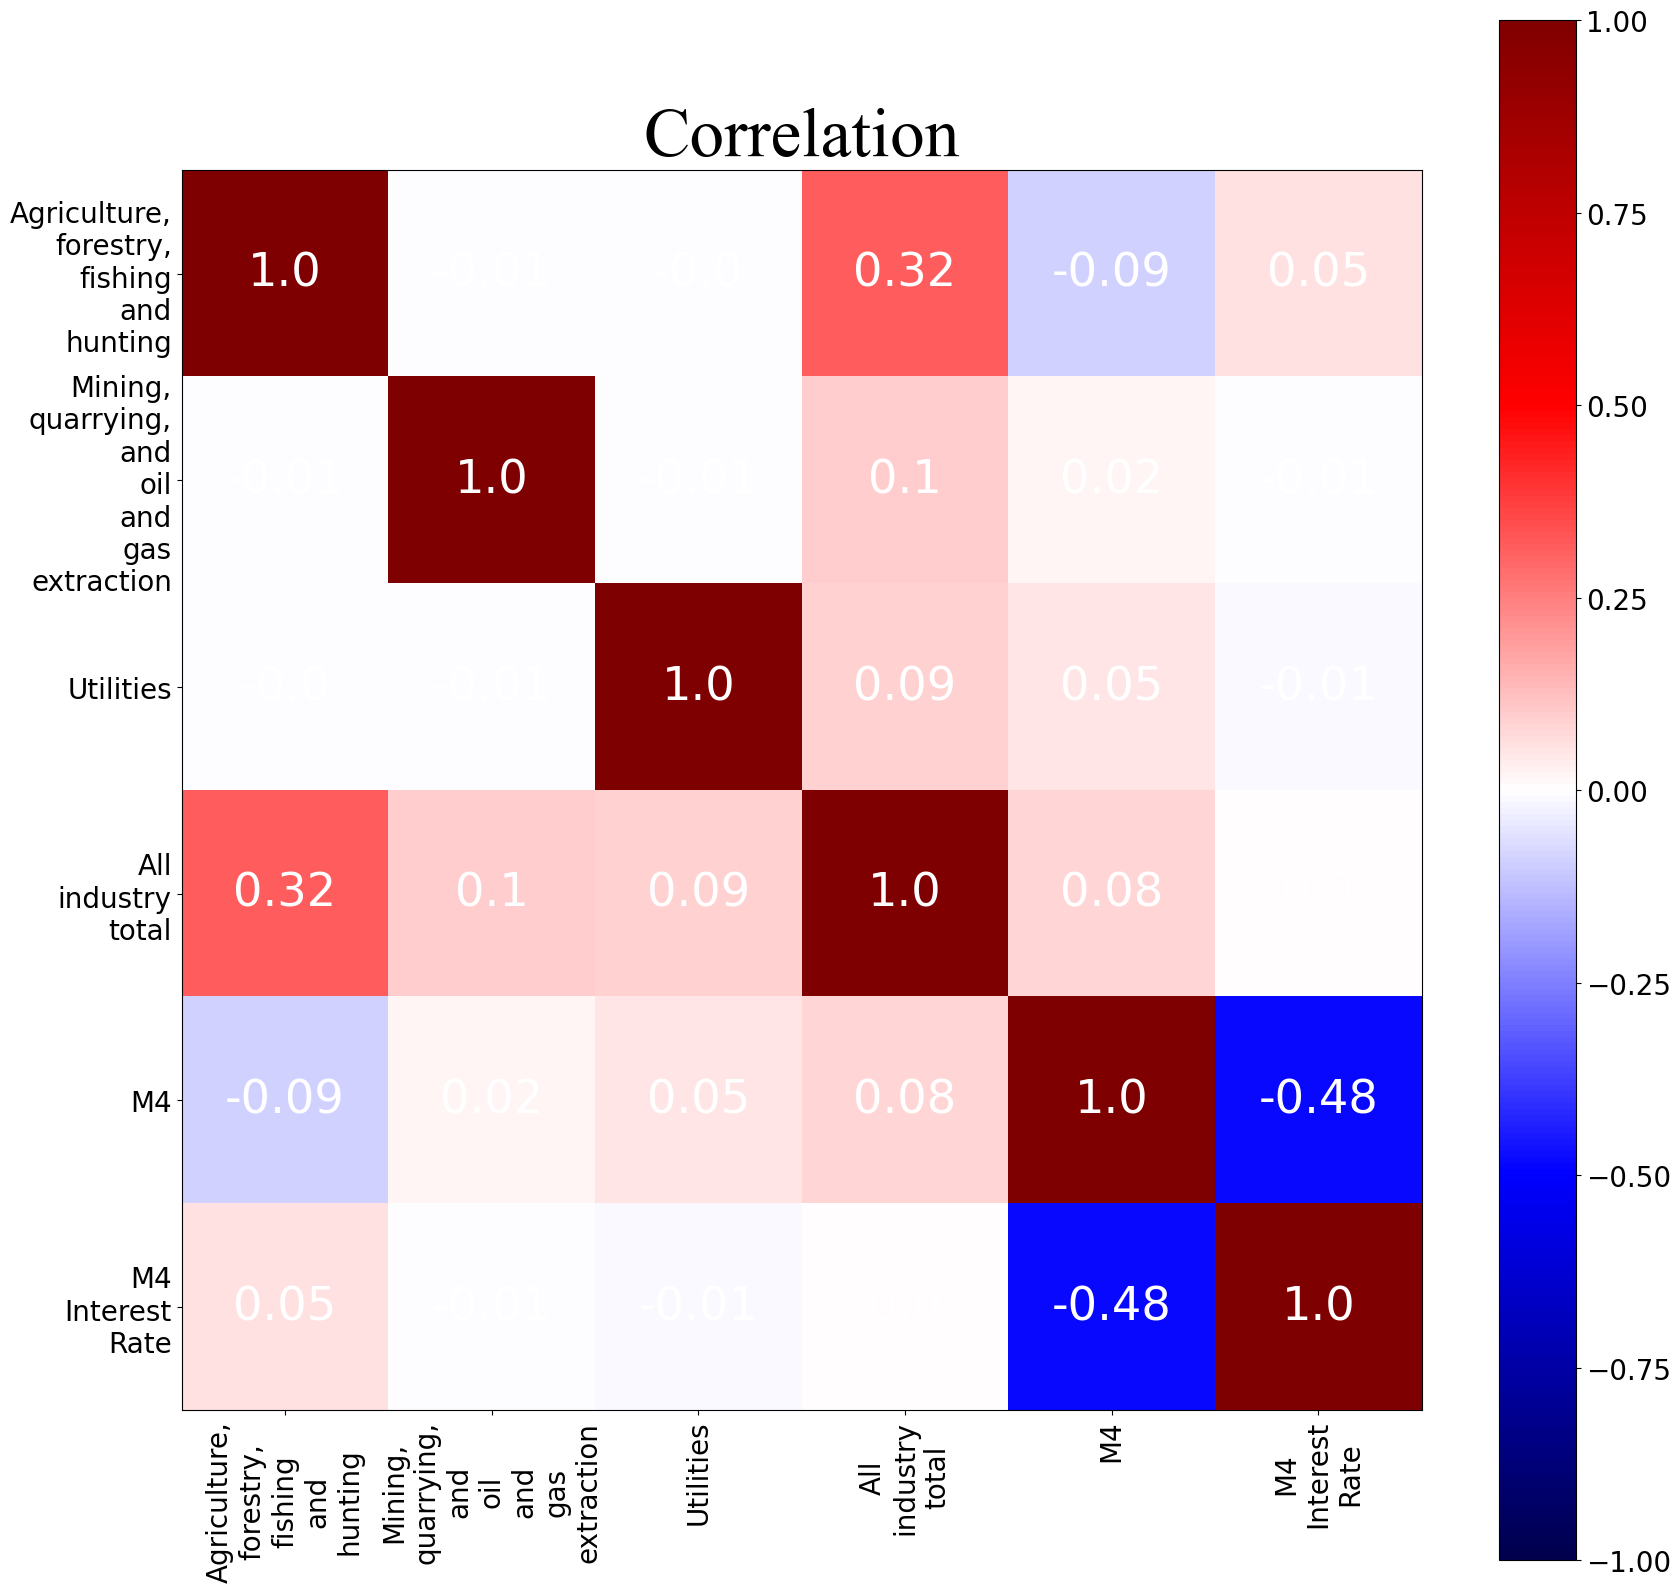

In [46]:
import numpy as np
# . . .
def corr_matrix_heatmap(data, pp = False):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    if pp != False:
        pp.savefig(fig, bbox_inches="tight")
    plt.close()

#. . . 
# . . .
corr_matrix_heatmap(plot_df.corr())


In [47]:
# list(plot_df)
# ips_df
plot_df.rename(columns = {key:key[:4].replace("\n", "") for key in plot_df.keys()}, inplace = True)
list(plot_df.keys())

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_17634/630816007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.rename(columns = {key:key[:4].replace("\n", "") for key in plot_df.keys()}, inplace = True)


['Agri', 'Mini', 'Util', 'All', 'M4', 'M4I']

### DAGs with multiple significance levels

In [48]:
Data = plot_df

In [49]:
# !brew install graphviz
# !pip install pygraphviz
# this will not install on the notebook
# in order to install these modules, open your computers powershell and install the following;
# conda install -c anaconda graphviz
# conda install -c conda-forge pygraphviz
# then import the module as follows;
# import pygraphviz as pgv

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

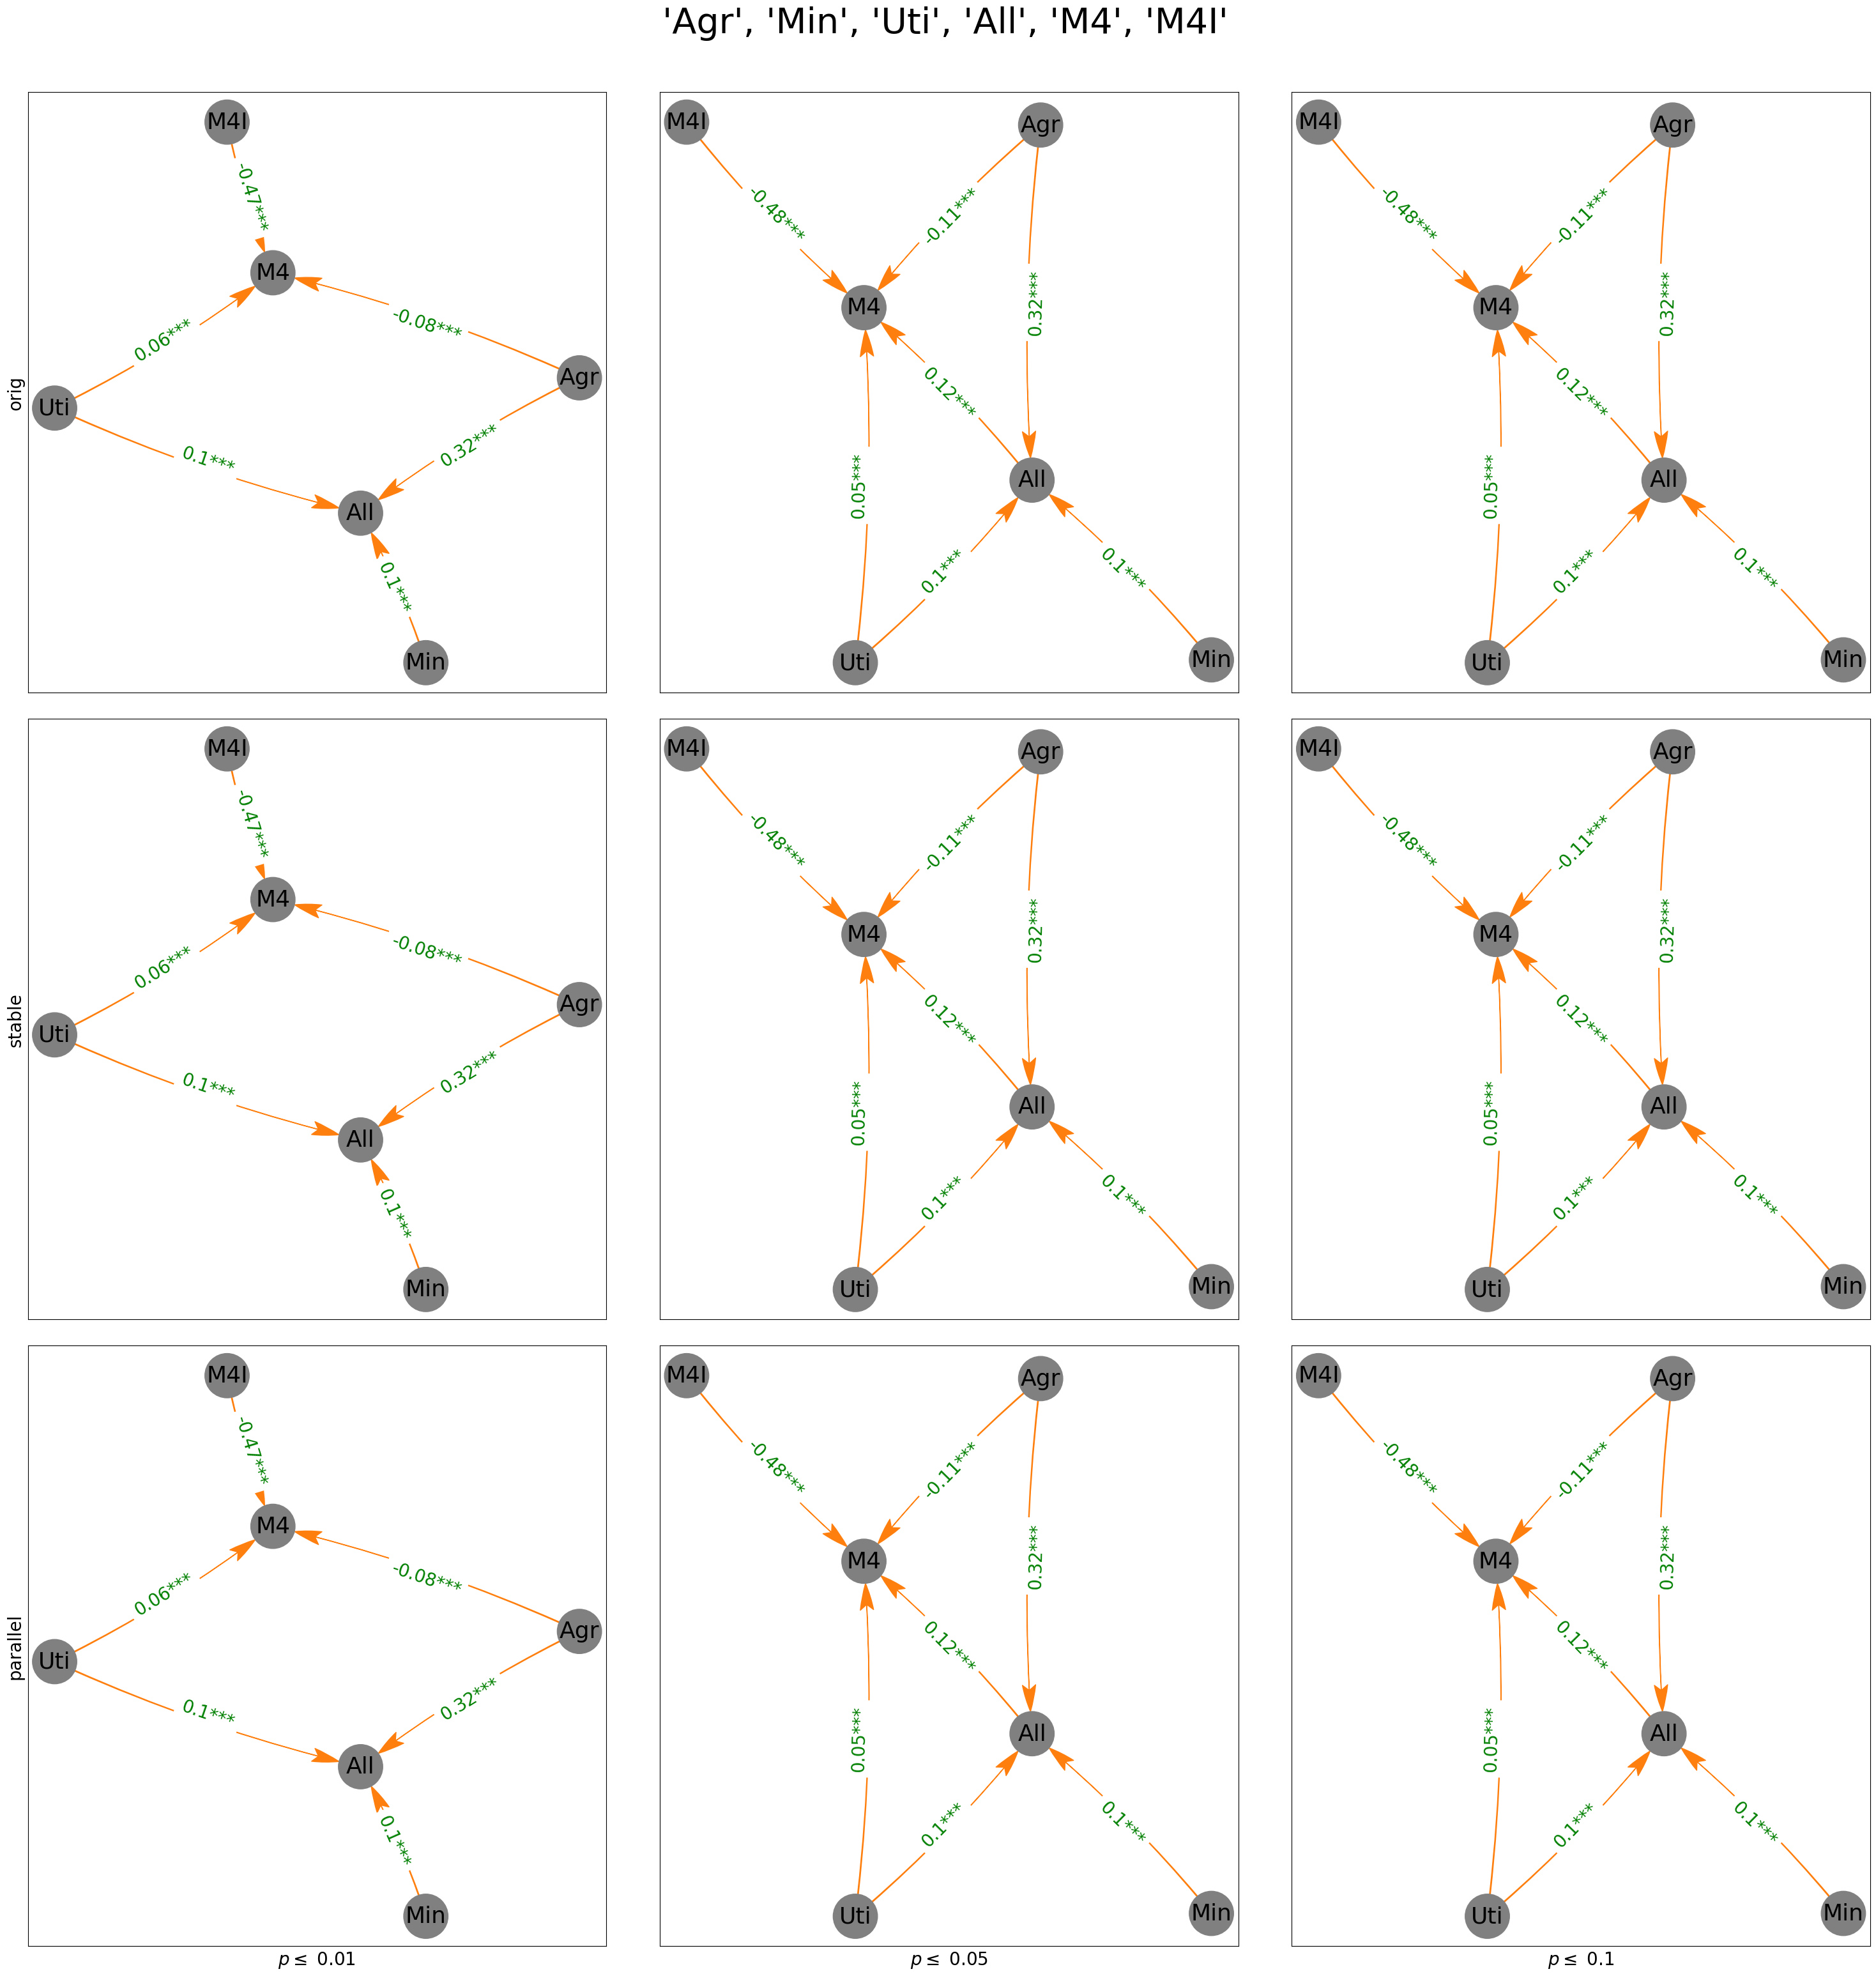

OutEdgeView([('Uti', 'M4'), ('Uti', 'All'), ('Agr', 'M4'), ('Agr', 'All'), ('Min', 'All'), ('All', 'M4'), ('M4I', 'M4')])

In [50]:
import pingouin
from pgmpy.estimators import PC
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
from networkx.drawing.nx_agraph import graphviz_layout
import warnings
warnings.filterwarnings("ignore")
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx


def firstLetterWord(str, num_chars = 3):
 
    result = ""
 
    # Traverse the string.
    v = True
    for i in range(len(str)):
         
        # If it is space, set v as true.
        if (str[i] == ' '):
            v = True
 
        # Else check if v is true or not.
        # If true, copy character in output
        # string and set v as false.
        elif (str[i] != ' ' and v == True):
            result += (str[i:i+num_chars])
            v = False
 
    return result

def graph_DAG(edges, data_reg, title = "", 
              fig = False, ax = False, 
              edge_labels = False,sig_vals = [0.05, 0.01, 0.001]):
    pcorr = data_reg.pcorr()
    graph = nx.DiGraph()
    def build_edge_labels(edges, df, sig_vals):
        edge_labels = {}
        for edge in edges:
            controls = [key for key in df.keys() if key not in edge]
            controls = list(set(controls))
            keep_controls = []
            for control in controls:
                control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
                if (control, edge[1]) in control_edges:
                    keep_controls.append(control)                
#             print(edge, keep_controls)
            pcorr = df.partial_corr(x = edge[0], y = edge[1], covar=keep_controls,
                                  method = "pearson")
            label = str(round(pcorr["r"][0],2))
            pvalue = pcorr["p-val"][0]
#             pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#             label = pcorr[edge[0]].loc[edge[1]]

            for sig_val in sig_vals:
                if pvalue < sig_val: 
                    label = label + "*"   
            
            edge_labels[edge] = label
        return edge_labels
    
    if edge_labels == False:
        edge_labels = build_edge_labels(edges, 
                                        data_reg, 
                                        sig_vals=sig_vals) 
    graph.add_edges_from(edges)
    color_map = ["grey" for g in graph]

    if fig == False and ax == False: fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = graphviz_layout(graph)

    edge_labels2 = []
    for u, v, d in graph.edges(data=True):
        if pos[u][0] > pos[v][0]:  
            if (v,u) in edge_labels.keys():
                edge_labels2.append(((u, v,), f'{edge_labels[u,v]}\n\n\n{edge_labels[(v,u)]}'))  
        if (v,u) not in edge_labels.keys():
            edge_labels2.append(((u,v,), f'{edge_labels[(u,v)]}'))
    edge_labels = dict(edge_labels2)

    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 2500,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     connectionstyle='arc3, rad = 0.05',
                     ax = a)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20,
                                ax = a)
    
    
pp = PdfPages("DAGOutputs.pdf")
DAG_models_vars = {5:["Agri", "Mini", "Util", "All", "M4", "M4I"],}
# link_sigs = [0.05, 0.1, 0.2]
# link_sigs = [0.3, 0.4, 0.5]
link_sigs = [0.01, .05, .1]
# link_sigs = [0.1, .2, .3]
algorithms = ["orig", "stable", "parallel"]
for keys in DAG_models_vars.values():
    fig, ax = plt.subplots(len(algorithms), len(link_sigs), figsize = (30,30))
    max_cond_vars = len(keys) - 2
    data_reg = Data[keys].dropna()
    data_reg.rename(columns = {col:firstLetterWord(col) for col in keys}, inplace = True)
    keys = data_reg.keys()
    c = PC(data_reg[keys].dropna())
    max_cond_vars = len(keys) - 2
    i,j = 0,0
    for sig in link_sigs:
        for algorithm in algorithms:
            model = c.estimate(return_type = "pdag", variant = algorithm, 
                               significance_level = sig, 
                               max_cond_vars = max_cond_vars, ci_test = "pearsonr")
#             model = c.estimate(return_type = "pdag", variant = algorithm, 
#                                significance_level = sig, 
#                                max_cond_vars = max_cond_vars, ci_test = "chi_square")
            edges = model.edges()
            pcorr = data_reg.pcorr()
            weights = {}
            a = ax[i][j]
            graph_DAG(edges, data_reg, fig = fig, ax = a)
        
            if j == 0:
                a.set_ylabel(algorithm, fontsize = 20)
            if i == len(algorithms) - 1:
                a.set_xlabel("$p \leq$ "+ str(sig), fontsize = 20)
            i += 1
        j += 1
        i = 0
    plt.suptitle(str(list(keys)).replace("[","").replace("]",""), fontsize = 40, y =1.035)
    plt.show()
    pp.savefig(fig, bbox_inches = "tight")
    plt.close()
pp.close()
edges

In [51]:
# pip install graphviz

In [52]:
# pip install pygraphviz


In [53]:
plot_df

Agri      Mini      Util       All        M4       M4I
GeoFips TimePeriod                                                            
1001    2004       -0.570860  0.279452  0.436969  0.125152  0.005541  0.010413
        2005       -0.053545 -0.231773 -0.744634 -0.128070  0.001951 -0.000447
        2006        0.007748  0.103809  0.676109  0.045002  0.007282 -0.010213
        2007       -0.512766 -0.238435 -0.287827 -0.049211  0.014678 -0.018616
        2008       -0.375903 -0.216993 -0.332819 -0.119366 -0.058983  0.004477
...                      ...       ...       ...       ...       ...       ...
56041   2016       -0.419914 -0.141738  0.312645 -0.016646 -0.004736  0.000948
        2017       -0.173316 -0.077019 -0.206667 -0.017309 -0.000315  0.002030
        2018        0.388456 -0.049230 -0.184281 -0.013734  0.009620 -0.002134
        2019        0.608357 -0.244903  0.459370  0.013506  0.155545 -0.007997
        2020       -0.565758 -0.295273 -0.300224 -0.084335 -0.110497  0.004883

[10659 rows x 6 columns]